In [32]:
import numpy as np
from PIL import Image 

In [3]:
ls

README.md
art.jpg
art_info_test.ipynb
data/
data.gz
data.json
data_analysis.ipynb
extract_page_info_by_url.py
extract_page_info_by_url.pyc
fill_database_with__multithread.py
get_search_result_url_with_multithread.py
img_segment_test.ipynb
insert_url_database.py
log.bak
log.txt
proxy.py
proxy.txt
proxy_process/
test_api_to_get_search_result.py
verified_proxy_list.txt


In [4]:
im = Image.open("art.jpg")  

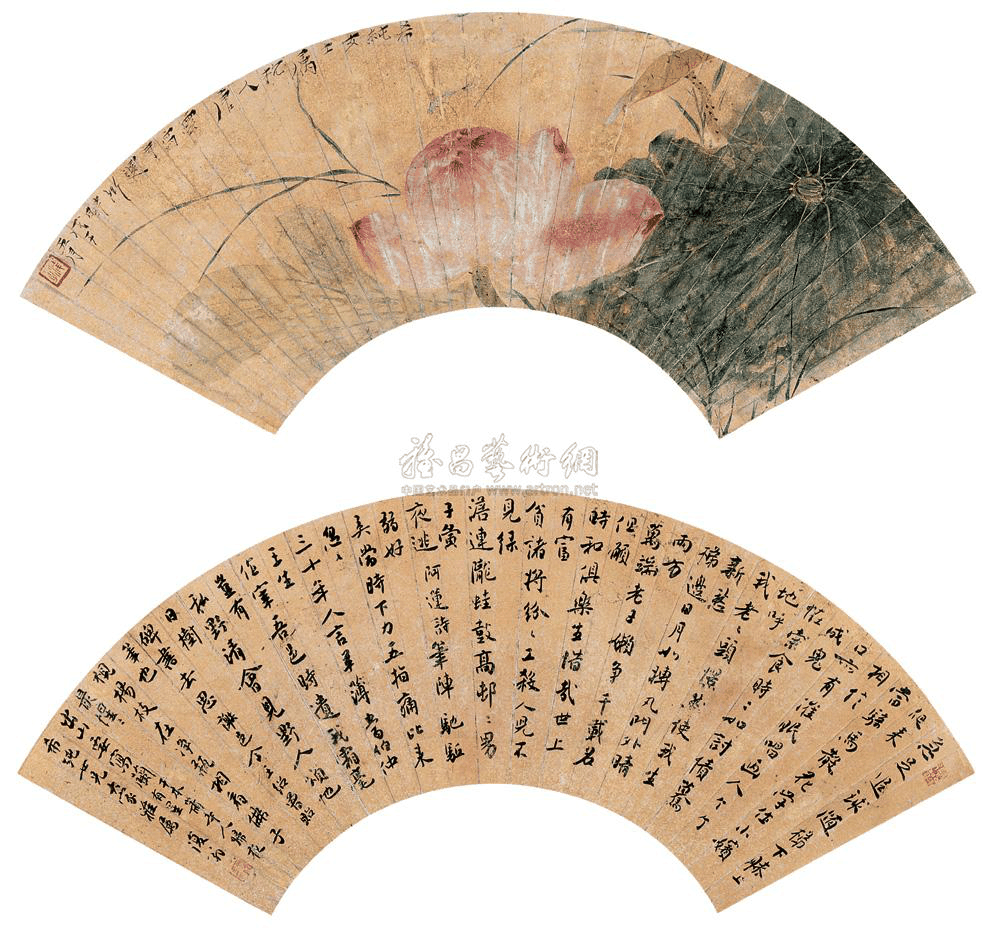

In [13]:
im.quantize()

In [84]:
a = im.convert('1')
r, g, b =im.split()

In [85]:
r = np.array(r)
g = np.array(g)
b = np.array(b)

In [67]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [105]:
np.min(1 * (b<255))

0

In [215]:
t = 1 * (r<255) + 1 * (g<255) +1 * (b<255)

<IPython.core.display.Javascript object>


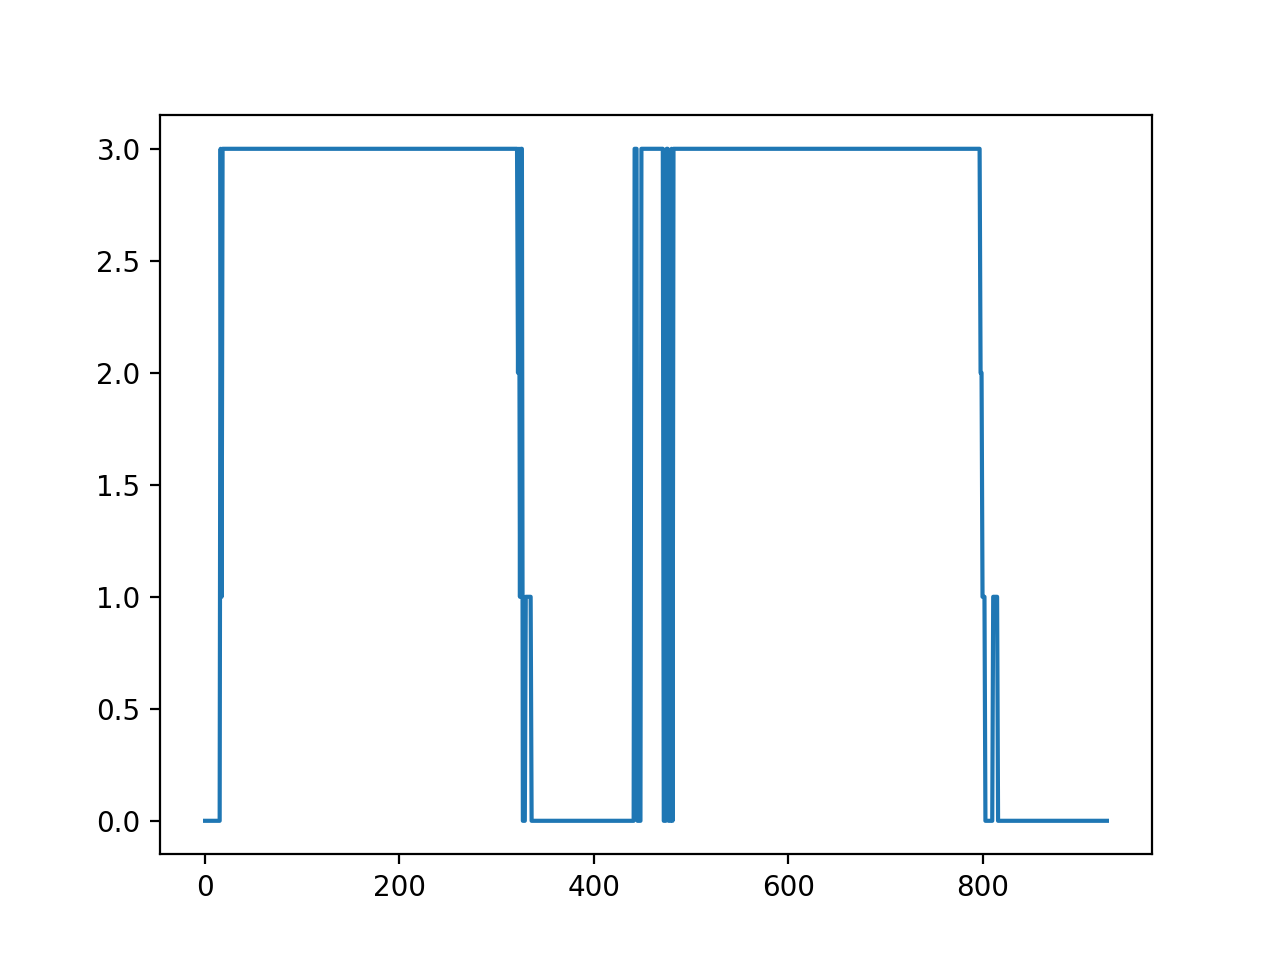

In [142]:
y = np.asarray(t)[:,580]
plt.figure()
plt.plot(y)

In [152]:
simple_index = np.linspace(0,len(y)-1,50).astype(int)

<IPython.core.display.Javascript object>


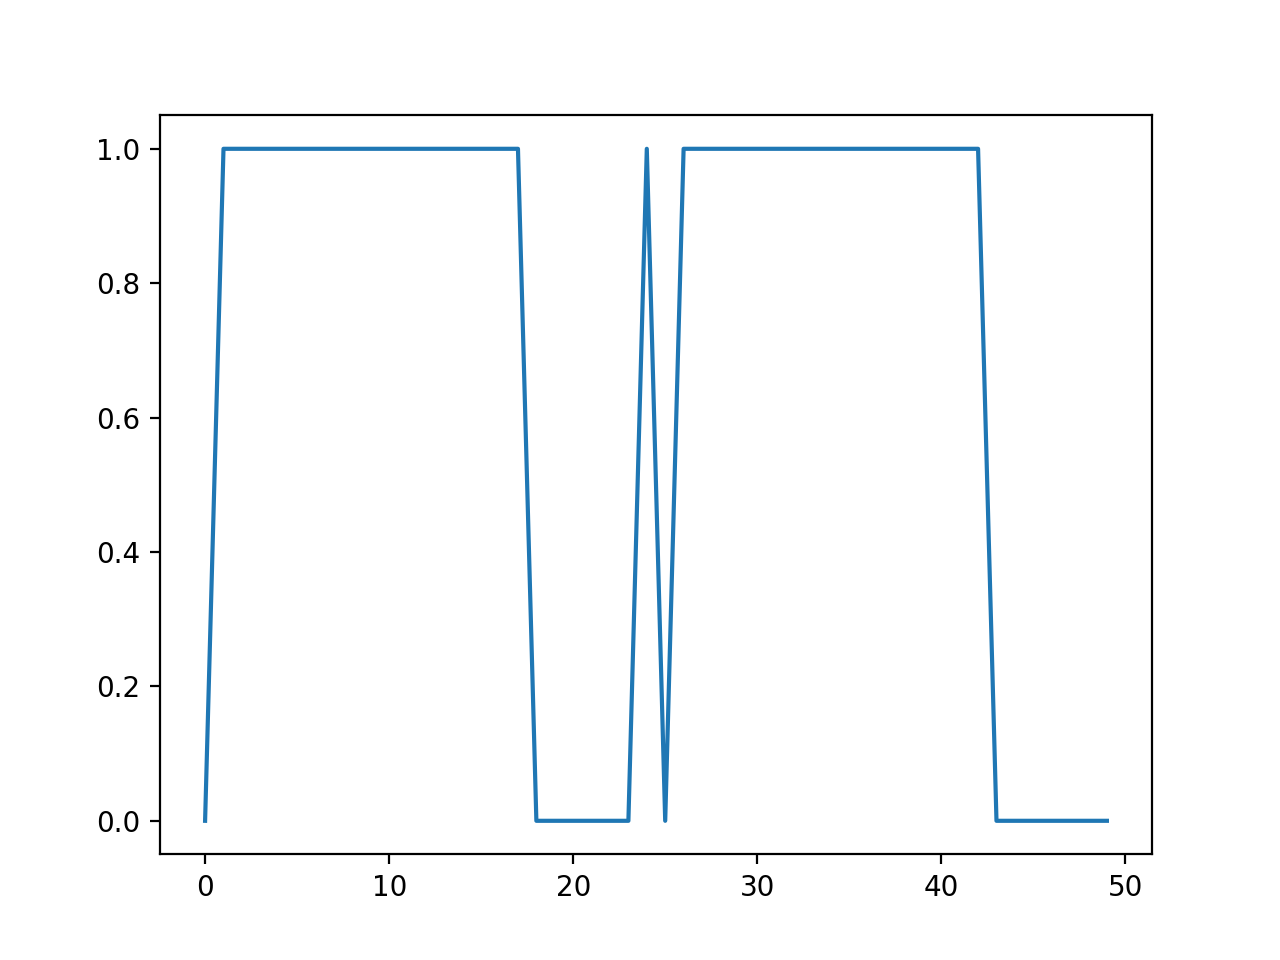

In [153]:
plt.figure()
plt.plot(1 * (y[simple_index] > np.max(y[simple_index])/1.414))

<IPython.core.display.Javascript object>


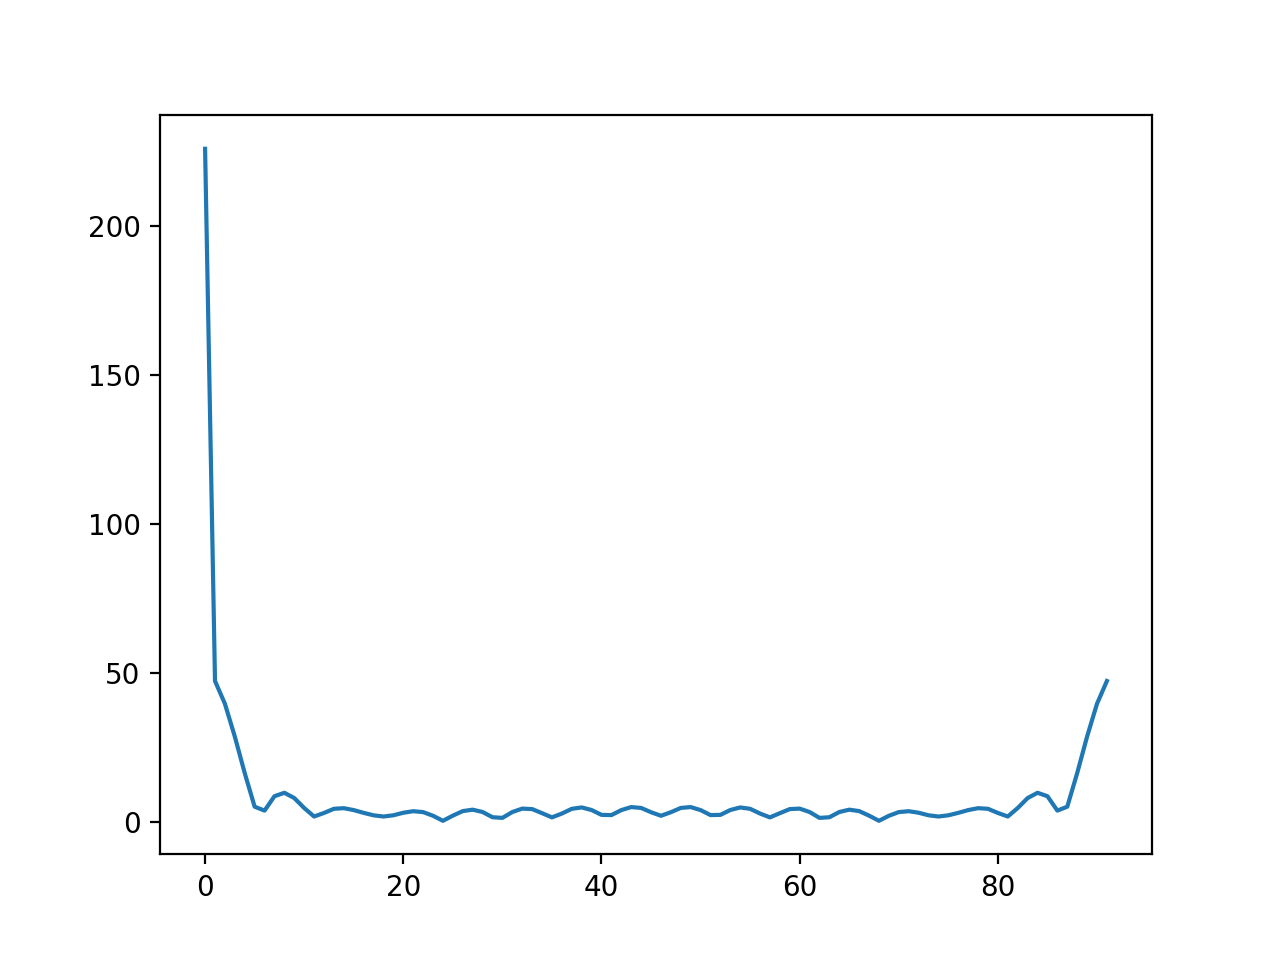

92


In [168]:
plt.figure()
plt.plot(abs(np.fft.fft(y,len(y)/10)))
print len(y)/10

In [200]:
ny = []
windows_length = 30
for i in range(len(y)):
    t = 0
    for j in range(windows_length):
        if i - j >= 0:
            t = t + y[i - j]
        else:
            break
    ny.append(t)

<IPython.core.display.Javascript object>


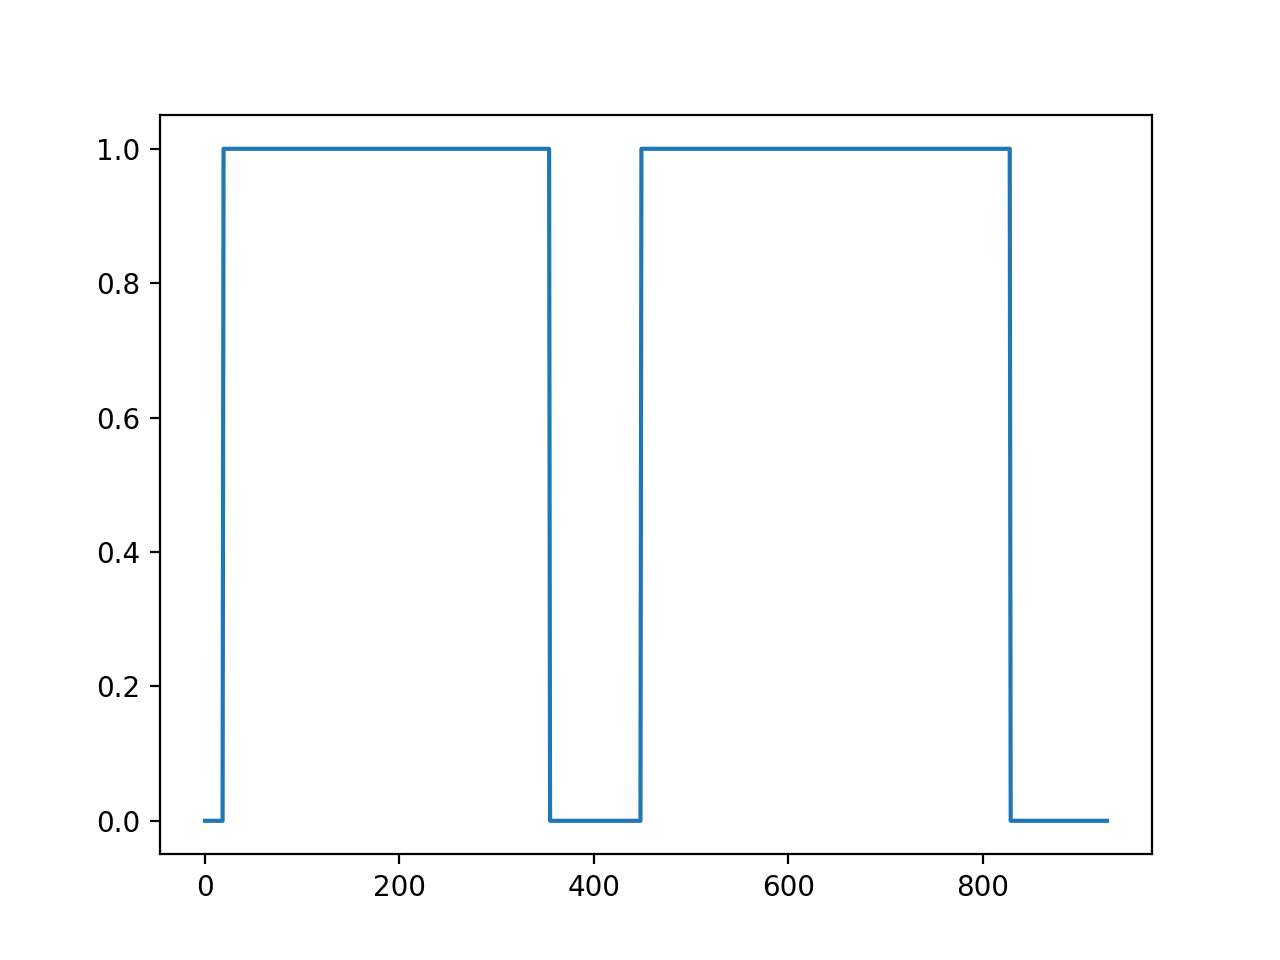

In [203]:
plt.figure()
nt = 1 * ny > np.max(ny)*0.1
plt.plot(nt)

In [205]:
nt[0]

False

In [212]:
num = 0
for i in range(len(nt)):
    if (i - 1 > 0 and nt[i - 1]  and not nt[i]):
        num = num + 1
num

2

In [367]:
def get_num(im, position=0.5, axis=0, windows_rate=80):
    r, g, b =im.split()
    r = np.array(r)
    g = np.array(g)
    b = np.array(b)
    t = 1 * (255-r) + 1 * (255-g) +1 * (255-b)
    pos = (t.shape[axis]-1)*position
    pos = int(pos)
    if axis == 0:
        y = np.asarray(t)[pos,:]
    else:
        y = np.asarray(t)[:,pos]
    ny = []
    windows_length = t.shape[axis]/windows_rate
    for i in range(len(y)):
        t = 0
        for j in range(windows_length):
            if i - j >= 0:
                t = t + y[i - j]
            else:
                break
        ny.append(t)
    num = 0
    nt = 1 * ny > np.max(ny)*0.05
    for i in range(len(nt)):
        if (i - 1 > 0 and nt[i - 1]  and not nt[i]):
            num = num + 1
    if nt[-1]:
        num = num + 1
    return num

In [368]:
print get_num(Image.open('art2.jpg'),position=0.25, axis=1)
print get_num(Image.open('art2.jpg'),position=0.5, axis=1)
print get_num(Image.open('art2.jpg'),position=0.75, axis=1)

4
4
4


In [369]:
print get_num(Image.open('art1.jpg'),position=0.25, axis=1)
print get_num(Image.open('art1.jpg'),position=0.5, axis=1)
print get_num(Image.open('art1.jpg'),position=0.75, axis=1)

1
1
1


In [370]:
print get_num(Image.open('art.jpg'),position=0.25, axis=1)
print get_num(Image.open('art.jpg'),position=0.5, axis=1)
print get_num(Image.open('art.jpg'),position=0.75, axis=1)

2
2
2


In [328]:
import requests

In [334]:
from StringIO import StringIO

In [372]:
file = requests.get('http://img4.artron.net/auction/2015/art507760/d/art5077600218.jpg')

In [373]:
imgfile = StringIO(file.content)

In [376]:
print get_num(Image.open(imgfile),position=0.25, axis=1)
print get_num(Image.open(imgfile),position=0.5, axis=1)
print get_num(Image.open(imgfile),position=0.75, axis=1)

3
3
3
